<h3>1- Business Understanding</h3>

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. [(source)](https://www.kaggle.com/airbnb/seattle/home)


[Here](https://www.kaggle.com/airbnb/seattle/data), you will find three datasets that describe Airbnb activities for one year and include the follwing: 

1- The calendar.csv, it has all the listing price of the airbnb housing from Jan 4th 2016 to Jan 2nd, 2017<br>
2- The listing.csv, it has specifc infomation about the listing such as its full descriptions, average review score, neighbourhood, amenity, picture_url, host information, etc.<br>
3- The reviews.csv, including unique id for each reviewer and detailed comments


Following are the Questions we try to analyze from these three datasets:<br>
1.	What are the busiest times of the year to visit Seattle? By how much do prices spike?
2.	Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
3.	What is the most populate Seattle neighborhood for Airbnb listings?
4.	Can we predict a price of Seattle Airbnb listings? What aspects correlate well to price?

<h3>2- Data Understanding</h3>

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [130]:
#import needed packeges
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import dataset
df_cal = pd.read_csv('./calendar.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [131]:
#Previewing the Calendar dataframe
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Now to look at our first question of interest: What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [132]:
#for more data understanding let's look at the clander data types
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [133]:
df_cal.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-02-04,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [134]:
#Is there any 'available' listing with Nan 'price? 
not_avilpl = ((df_cal['available'] == 't') & (df_cal['price'].isnull())).sum()
print(not_avilpl)

0


In [135]:
#Checking for percentage of missing values in the price column in the calender dataframe
print('Percentage of missing values in price column:', df_cal['price'].isnull().mean()) # missing values

Percentage of missing values in price column: 0.32938998399793334


The answer is : no available' listing with Nan 'price

In [136]:
#Previewing the reviews dataframe
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [137]:
df_reviews.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


<h3>3- Data Preparation</h3>

In [138]:
#convert the data of time and price to remove the $ and drp nan value and keep just the avilable houses
df_cal['date'] = pd.to_datetime(df_cal['date'])
df_cal[['price']] = df_cal[['price']].replace('[\$,]','',regex=True).astype(float)
#Keeping rows in price where the value is not null and creating a new dataframe with that criteria
df_cal = df_cal.dropna()
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [139]:
# group date by date and pric with mean 
pricedf = df_cal.groupby(['date'])['price'].mean()
pricedf.describe()

count    365.000000
mean     137.901783
std        9.860142
min      117.685413
25%      132.446443
50%      136.731206
75%      146.930502
max      157.480000
Name: price, dtype: float64

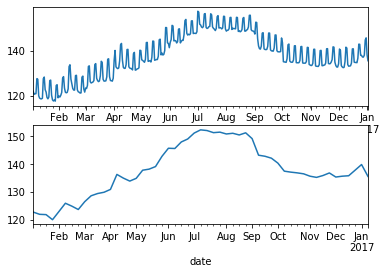

In [140]:
plt.subplot(211)
pricedf.resample('D').mean().plot()

plt.subplot(212)
pricedf.resample('W').mean().plot()

In [141]:
# group date by date and pric with median
pricedf_med = df_cal.groupby(['date'])['price'].median()
pricedf_med.describe()

count    365.000000
mean     107.794521
std        5.615566
min       99.000000
25%      105.000000
50%      109.000000
75%      110.000000
max      120.000000
Name: price, dtype: float64

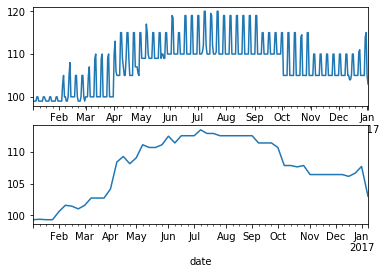

In [142]:
plt.subplot(211)
pricedf_med.resample('D').mean().plot()
plt.subplot(212)
pricedf_med.resample('W').mean().plot()

In [143]:
# add month column 
df_cal['month'] = df_cal['date'].dt.month
df_cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


In [144]:
df_cal.groupby(['month'])[['price']].mean()

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


In [145]:
#percentage of monthly price increase 
price_m_df = df_cal.groupby(['month'])[['price']].mean()
m_increase = ((price_m_df.max() - price_m_df.min()) / price_m_df.min() )  * 100
print(m_increase)

price    23.742134
dtype: float64


Text(0, 0.5, 'Avrege Price')

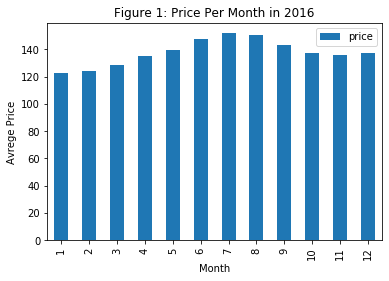

In [146]:
df_cal.groupby(['month'])[['price']].mean().plot(kind = 'bar')
plt.title('Figure 1: Price Per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Avrege Price')

Text(0, 0.5, '% of Change')

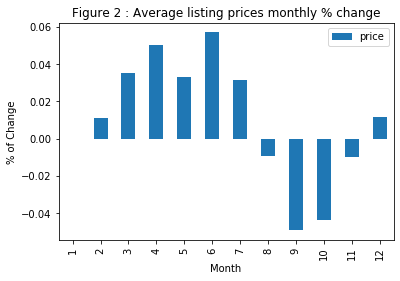

In [147]:
#Finding the percentage change of average listing prices per month
df_cal.groupby(['month'])[['price']].mean().pct_change().plot(kind = 'bar')
plt.title('Figure 2 : Average listing prices monthly % change')
plt.xlabel('Month')
plt.ylabel('% of Change')

In [148]:
#number of listings per month, shows list of total available listings per month in descending order of totals
df_cal['month'].value_counts().sort_values(ascending = False)

12    87061
3     83938
10    82438
11    81780
5     79971
9     77246
6     77244
8     76347
4     76037
7     74222
2     73321
1     64937
Name: month, dtype: int64

Text(0, 0.5, 'Number of Listings')

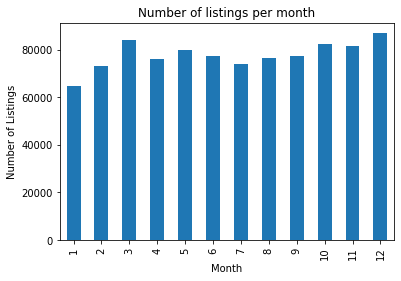

In [149]:
#plot showing number of listings per month
df_cal['month'].value_counts().sort_index().plot(kind = "bar")
plt.title('Number of listings per month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')

Text(0, 0.5, 'Number of Listings')

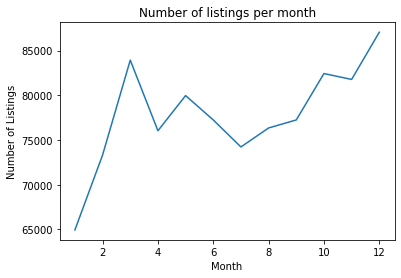

In [150]:
#calculating the amount of monthly listings
num_monthly_listings = df_cal.groupby('month')['listing_id'].count()
#plotting the amount of monthly listings
num_monthly_listings.plot(kind = "line")
plt.title('Number of listings per month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')

In [151]:
#converting the date field in reviews to a datetime object
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

In [152]:
# Then extract year and month information into new columns.
df_reviews['year'] = df_reviews['date'].dt.year
df_reviews['month'] = df_reviews['date'].dt.month
# Display a random sampling of 5 rows
df_reviews.sample(5, random_state=0)

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
78157,3861673,22910899,2014-11-17,7037587,Sarah,"Debbie was promptly communicative, welcoming, ...",2014,11
80209,365550,21939626,2014-10-27,17783716,Thomas,"For our first time in Seattle, Dirk and Jaq's ...",2014,10
46958,1321090,8256811,2013-10-22,8860136,Jenn,"The place is charming, clean, and ideally loca...",2013,10
17469,4768038,35219740,2015-06-16,10072726,Wendy,Matt's is a warm and welcoming host. His apart...,2015,6
59970,533443,44618948,2015-08-27,19706013,Matthew,Tom was very helpful in planning our night in ...,2015,8


Text(0, 0.5, 'Number of Reviews')

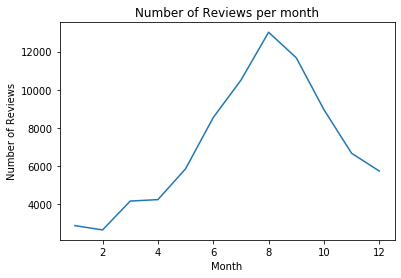

In [153]:
#calculating the amount of monthly reviews
num_monthly_reviews = df_reviews.groupby('month')['listing_id'].count()

#plotting the amount of monthly reviews
num_monthly_reviews.plot(kind = 'line')
plt.title('Number of Reviews per month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

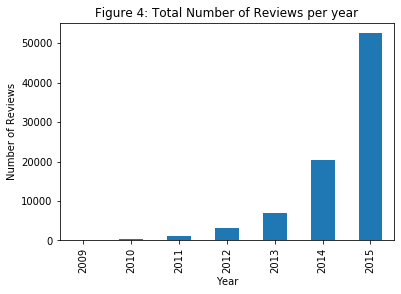

In [154]:
df_reviews_wo_2016 = df_reviews.query('year != 2016')
num_yearly_reviews = df_reviews_wo_2016.groupby('year')['listing_id'].count()

#plotting the amount of monthly reviews
num_yearly_reviews.plot(kind = 'bar')
plt.title('Figure 4: Total Number of Reviews per year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

In [155]:
#correlation between number of monthly listings and number of monthly reviews
num_monthly_listings.corr(num_monthly_reviews)

0.13081283272591424

In [156]:
# Group by year for unique listings count
# We exclude a few days data of 2016.

listings_per_year = df_reviews_wo_2016.groupby('year')['listing_id'].nunique()

In [157]:
#correlation between number of monthly listings and number of monthly reviews
listings_per_year.corr(num_yearly_reviews)

0.9996419745262726

Text(0.5, 1.0, 'Figure 3: Total number of unique listings per year')

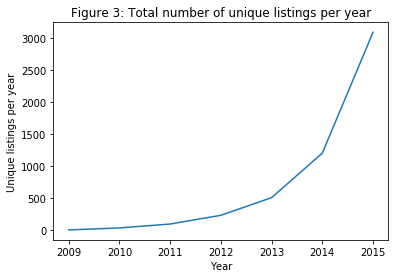

In [158]:
#plotting the amount of monthly reviews
listings_per_year.plot(kind = 'line')
plt.ylabel('Unique listings per year')
plt.xlabel('Year')
plt.title('Figure 3: Total number of unique listings per year')

<h3>4-Conclusion</h3>

Now we can complete answers to first two question.
Q1: What are the busiest times of the year to visit Seattle? By how much do prices spike?
Q2: Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

1-As we can see from the line graph, it seems that the busiest season of Seattle in a year is around summer, and  
the price keeps going from January (122 average) and reached the peak on July (152 average), costing on average over 23.7% than January.
2-As we can see from the line graph of the rate of change of average price of listing for each month, the biggest rate of change happened in June and the lowest happened in September. 
3- Both number of visitor and number of listings are exponentially increaing from 2009 to 2015.
